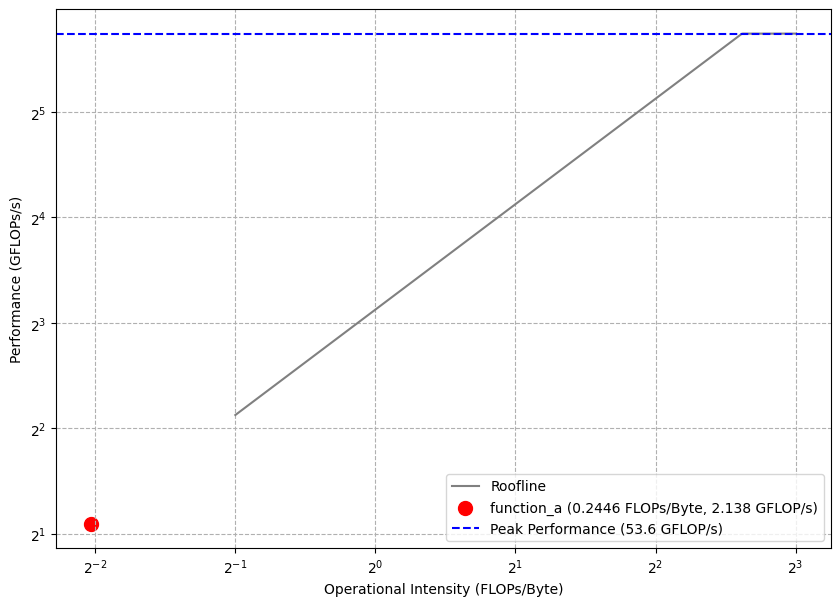

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

operational_intensity = 0.2448
performance = 2137.9748e6 / 1e9  # Convert to GFLOPs

# Constants for computation
peak_performance = 53.6e9  # Calculated peak performance in FLOPs per second
peak_bandwidth = 8733.1675e6  # Peak memory bandwidth in Bytes per second from previous profiling

# Convert peak performance to GFLOP/s for the y-axis
peak_performance_gflops = peak_performance / 1e9  # Convert to GFLOP/s

# Operational Intensity Range
oi_range = np.logspace(-1, 3, base=2, num=500)  # From 0.1 to 1000 FLOPs/Byte, base-2 log scale

# Calculate performance limit due to memory bandwidth, convert to GFLOP/s
memory_limited_performance = (oi_range * peak_bandwidth) / 1e9  # Convert to GFLOP/s

# Performance cannot exceed the peak performance of the CPU
performance_limit = np.minimum(peak_performance_gflops, memory_limited_performance)

# Create the roofline plot
plt.figure(figsize=(10, 7))
plt.loglog(oi_range, performance_limit, label="Roofline", color='gray')
plt.scatter([operational_intensity], [performance], color='red', s=100, label='function_a (0.2446 FLOPs/Byte, 2.138 GFLOP/s)')

# Annotations and labels
# plt.title('Roofline Model')
plt.xlabel('Operational Intensity (FLOPs/Byte)')
plt.ylabel('Performance (GFLOPs/s)')
plt.axhline(y=peak_performance_gflops, color='blue', linestyle='--', label=f'Peak Performance ({peak_performance_gflops} GFLOP/s)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.xscale('log', base=2)  # Set x-axis to log scale with base 2
plt.yscale('log', base=2)  # Set y-axis to log scale with base 2
plt.show()
